In [83]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [84]:
def return_path(path_to_data, recording):
    recording_folder = '\\'.join([path_to_data, recording])
    return '\\'.join([recording_folder, recording]) + '.csv'

In [85]:
path_to_data = r'C:\Users\Rory\raw_data\SERT_DREADD\spikes_df'

recordings_to_analyse = ['401a_2018-04-18_16-34-20_NO_CNO',
                        '401a_2018-04-18_17-40-36_CNO']

In [86]:
df_list = []
for recording_to_analyse in recordings_to_analyse:
    
    csv_file = return_path(path_to_data=path_to_data,
                      recording=recording_to_analyse)

    df = pd.read_csv(csv_file, index_col=0)
    df_list.append(df)
    
try:
    assert len(df_list) == len(recordings_to_analyse)
except AssertionError:
    print('Problem loading data:\tCSV files incorrectly loaded into DFs')

In [87]:
df1 = df_list[0]
df2 = df_list[1]
print('df1 shape:\t{}'.format(df1.shape[0]))
print('df2 shape:\t{}'.format(df2.shape[0]))

df1 shape:	170489
df2 shape:	246555


In [88]:
df1.drop('spike_time', inplace=True, axis=1)
df1['time'] = pd.to_timedelta(df1['time'], unit='s')
df1.set_index('time', inplace=True)

In [89]:
df1['spike'] = 1
df1 = df1.pivot(columns='spike_cluster', values='spike')

In [90]:
secondly_counts = df1.resample('s').count()
rolling_1 = secondly_counts.rolling(60*5).mean()

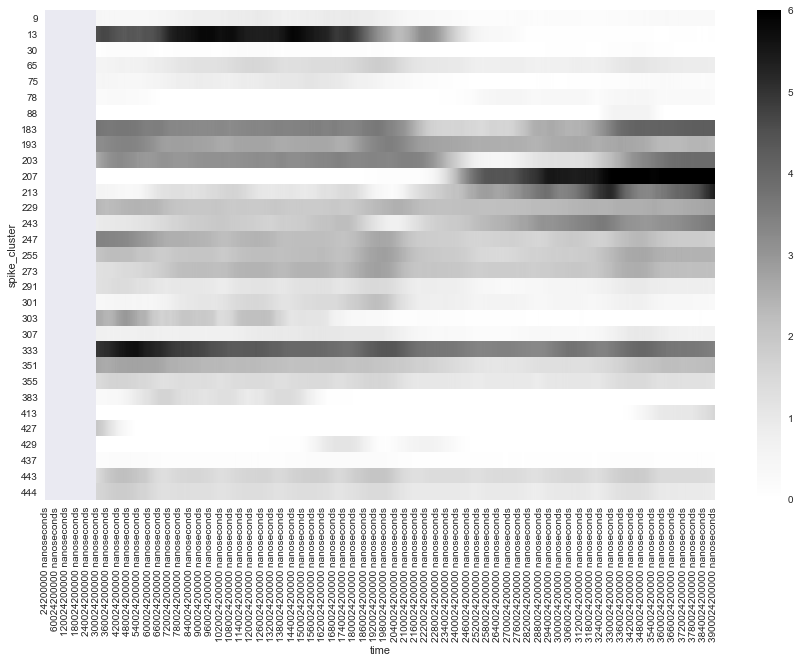

In [102]:
f, a = plt.subplots(figsize=(15, 9))
sns.heatmap(rolling_1.transpose(), ax=a, cmap='Greys', vmin=0, vmax=6)


In [92]:
df2.drop('spike_time', inplace=True, axis=1)
df2['time'] = pd.to_timedelta(df2['time'], unit='s')
df2.set_index('time', inplace=True)
df2['spike'] = 1
df2 = df2.pivot(columns='spike_cluster', values='spike')
secondly_counts = df2.resample('s').count()
rolling_2 = secondly_counts.rolling(60*5).mean()

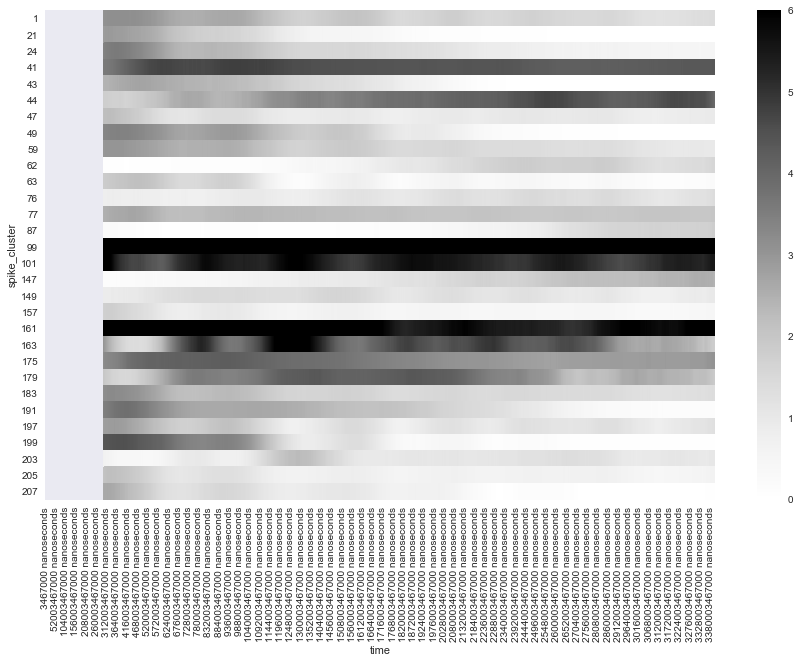

In [95]:
f, a = plt.subplots(figsize=(15, 9))

sns.heatmap(rolling_2.transpose(), ax=a, cmap='Greys', vmin=0, vmax=6)